In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
import joblib
import os

In [3]:
defense = pd.read_csv('/Users/blairjdaniel/lighthouse/lighthouse/NHL/files/linear_reg_csv_files/defense_lr.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/blairjdaniel/lighthouse/lighthouse/NHL/files/linear_reg_csv_files/defense_lr.csv'

In [ ]:
defense.head(50)

,Unnamed: 0,name,GP,SV%_x,W,L,GA,SOG,SO,TIME,CAP HIT
0,1,"Allen, Jake",454.0,0.908,206.0,181.0,1176.0,12729.0,28.0,25626.0,"$3,850,000"
1,2,"Andersen, Frederik",509.0,0.916,304.0,132.0,1248.0,14802.0,28.0,29401.0,"$3,400,000"
2,3,"Annunen, Justus",44.0,0.901,24.0,14.0,113.0,1142.0,2.0,2375.0,"$837,500"
3,4,"Askarov, Yaroslav",16.0,0.899,5.0,7.0,43.0,427.0,0.0,857.0,"$925,000"
4,5,"Binnington, Jordan",326.0,0.906,165.0,115.0,880.0,9392.0,18.0,18868.0,"$6,000,000"
5,9,"Blackwood, Mackenzie",243.0,0.906,99.0,98.0,676.0,7188.0,13.0,13691.0,"$2,350,000"
6,11,"Bobrovsky, Sergei",745.0,0.914,424.0,240.0,1849.0,21594.0,48.0,42978.0,"$10,000,000"
7,20,"Comrie, Eric",73.0,0.898,31.0,34.0,216.0,2110.0,3.0,4093.0,"$3,000,00"
8,21,"Copley, Pheonix",77.0,0.898,44.0,17.0,202.0,1988.0,4.0,4261.0,"$1,000,000"
9,24,"Daccord, Joey",114.0,0.908,44.0,45.0,293.0,3165.0,4.0,6436.0,"$1,200,000"


In [380]:
# Display basic information about the DataFrame
goalies.info()

# Display summary statistics
goalies.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  69 non-null     int64  
 1   name        69 non-null     object 
 2   GP          69 non-null     float64
 3   SV%_x       69 non-null     float64
 4   W           69 non-null     float64
 5   L           69 non-null     float64
 6   GA          69 non-null     float64
 7   SOG         69 non-null     float64
 8   SO          69 non-null     float64
 9   TIME        69 non-null     float64
 10  CAP HIT     69 non-null     object 
dtypes: float64(8), int64(1), object(2)
memory usage: 6.1+ KB


,Unnamed: 0,GP,SV%_x,W,L,GA,SOG,SO,TIME
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.00000,69.000000,69.000000,69.000000
mean,62.043478,223.217391,0.905159,108.724638,78.826087,579.26087,6377.884058,12.898551,12639.144928
std,35.111769,200.263860,0.008759,106.530427,69.275443,498.76296,5774.962145,14.753011,11557.487403
min,1.000000,15.000000,0.877000,5.000000,7.000000,43.00000,427.000000,0.000000,857.000000
25%,33.000000,84.000000,0.901000,39.000000,32.000000,227.00000,2288.000000,3.000000,4655.000000
50%,61.000000,164.000000,0.906000,72.000000,55.000000,431.00000,4615.000000,7.000000,9011.000000
75%,94.000000,281.000000,0.910000,148.000000,97.000000,725.00000,8078.000000,16.000000,15953.000000
max,121.000000,1047.000000,0.918000,573.000000,337.000000,2622.00000,29745.000000,76.000000,60531.000000


In [381]:
# Remove NaN from salary and predict on them after the model is built
goalies = goalies.dropna(subset=['CAP HIT'])

In [382]:
# Change CAP HIT to a float and name is salary
goalies = goalies.rename(columns={'CAP HIT': 'salary'})

# Strip the $
goalies['salary'] = goalies['salary'].str.replace('$', '').str.replace(',', '').astype(float)


In [383]:
goalies.describe()

,Unnamed: 0,GP,SV%_x,W,L,GA,SOG,SO,TIME,salary
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.00000,69.000000,69.000000,69.000000,6.900000e+01
mean,62.043478,223.217391,0.905159,108.724638,78.826087,579.26087,6377.884058,12.898551,12639.144928,3.195205e+06
std,35.111769,200.263860,0.008759,106.530427,69.275443,498.76296,5774.962145,14.753011,11557.487403,2.503846e+06
min,1.000000,15.000000,0.877000,5.000000,7.000000,43.00000,427.000000,0.000000,857.000000,3.000000e+05
25%,33.000000,84.000000,0.901000,39.000000,32.000000,227.00000,2288.000000,3.000000,4655.000000,1.000000e+06
50%,61.000000,164.000000,0.906000,72.000000,55.000000,431.00000,4615.000000,7.000000,9011.000000,2.350000e+06
75%,94.000000,281.000000,0.910000,148.000000,97.000000,725.00000,8078.000000,16.000000,15953.000000,4.900000e+06
max,121.000000,1047.000000,0.918000,573.000000,337.000000,2622.00000,29745.000000,76.000000,60531.000000,1.000000e+07


In [384]:
goalies = goalies.drop(columns=['Unnamed: 0',])

In [385]:
games_played = goalies.groupby(by=['GP', 'name'], ).sum()
# Sort the resulting DataFrame by 'GP' in descending order
games_played_sorted = games_played.sort_values(by='GP', ascending=True)

games_played.head()

,,SV%_x,W,L,GA,SOG,SO,TIME,salary
GP,name,,,,,,,,
15.0,"Greaves, Jet",0.910,5.0,8.0,48.0,535.0,0.0,877.0,850000.0
16.0,"Askarov, Yaroslav",0.899,5.0,7.0,43.0,427.0,0.0,857.0,925000.0
19.0,"Silovs, Arturs",0.880,8.0,8.0,57.0,474.0,0.0,1092.0,850000.0
24.0,"Fedotov, Ivan",0.877,5.0,12.0,70.0,569.0,0.0,1289.0,3275000.0
39.0,"Levi, Devon",0.894,17.0,17.0,121.0,1146.0,0.0,2205.0,925000.0


In [386]:
# Define the function to assign salary based on games played
def assign_salary(gp):
    if gp <= 50:
        return 900000
    elif gp <= 100:
        return 2000000
    elif gp <= 150:
        return 3000000
    elif gp <= 200:
        return 5000000
    elif gp <= 300:
        return 8000000
    elif gp <= 400:
        return 9000000
    elif gp > 401:
        return 10000000
    else:
        return 0  # Default value if GP is greater than 200

# Apply the function to the 'GP' column to create the 'salary' column
goalies['salary'] = goalies['GP'].apply(assign_salary)
goalies.head(50)

,name,GP,SV%_x,W,L,GA,SOG,SO,TIME,salary
0,"Allen, Jake",454.0,0.908,206.0,181.0,1176.0,12729.0,28.0,25626.0,10000000
1,"Andersen, Frederik",509.0,0.916,304.0,132.0,1248.0,14802.0,28.0,29401.0,10000000
2,"Annunen, Justus",44.0,0.901,24.0,14.0,113.0,1142.0,2.0,2375.0,900000
3,"Askarov, Yaroslav",16.0,0.899,5.0,7.0,43.0,427.0,0.0,857.0,900000
4,"Binnington, Jordan",326.0,0.906,165.0,115.0,880.0,9392.0,18.0,18868.0,9000000
5,"Blackwood, Mackenzie",243.0,0.906,99.0,98.0,676.0,7188.0,13.0,13691.0,8000000
6,"Bobrovsky, Sergei",745.0,0.914,424.0,240.0,1849.0,21594.0,48.0,42978.0,10000000
7,"Comrie, Eric",73.0,0.898,31.0,34.0,216.0,2110.0,3.0,4093.0,2000000
8,"Copley, Pheonix",77.0,0.898,44.0,17.0,202.0,1988.0,4.0,4261.0,2000000
9,"Daccord, Joey",114.0,0.908,44.0,45.0,293.0,3165.0,4.0,6436.0,3000000


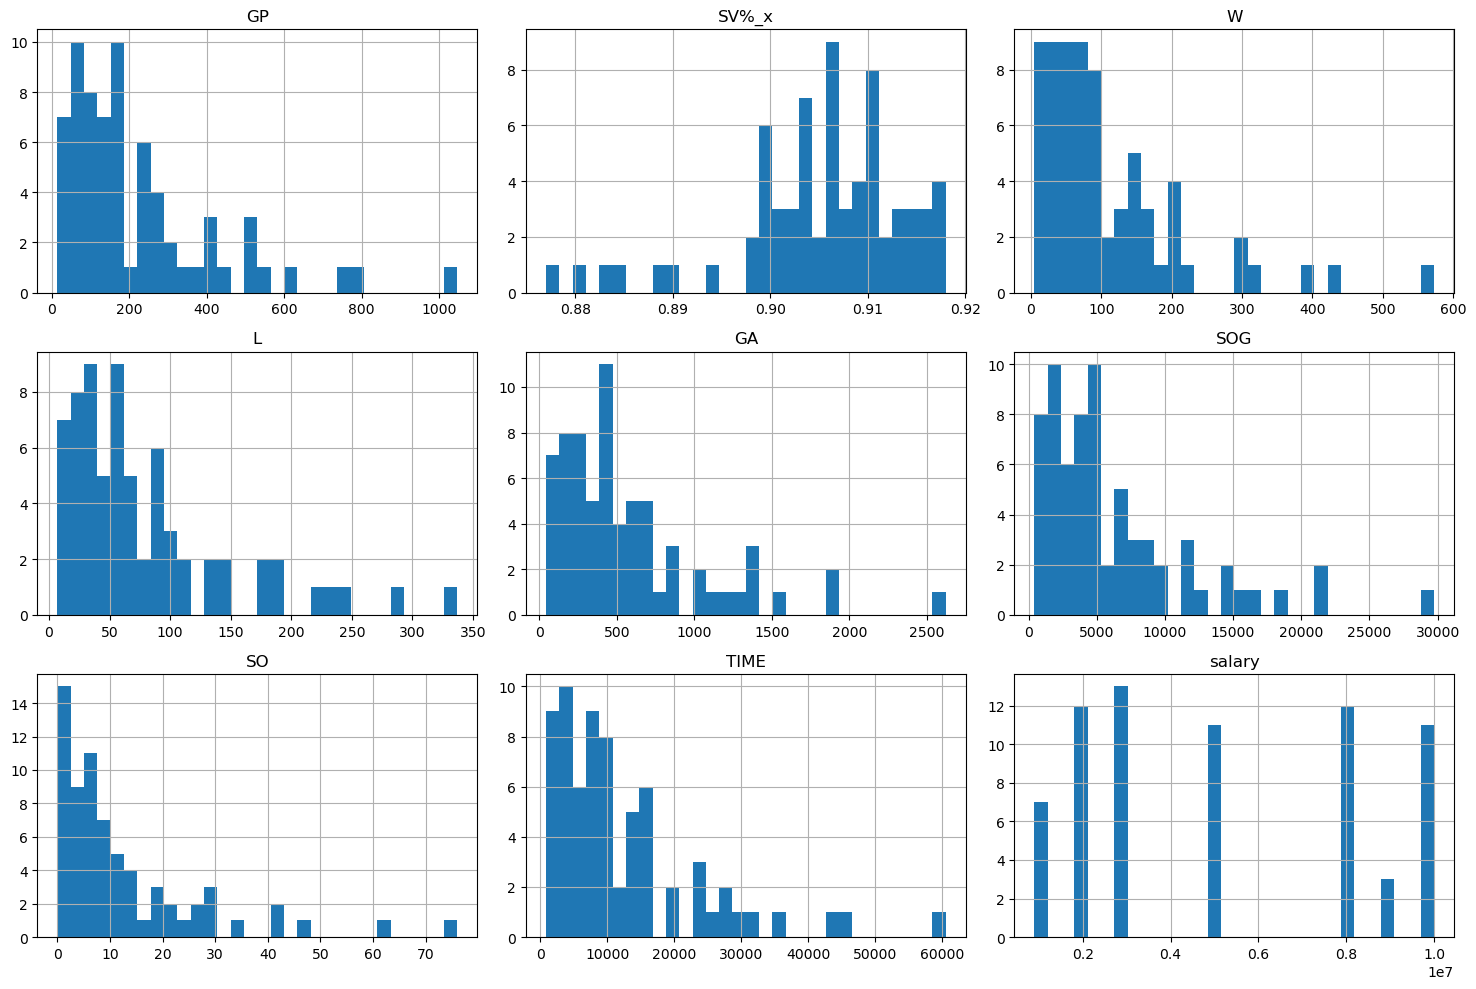

In [387]:
# Plot histograms for numerical features
goalies.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

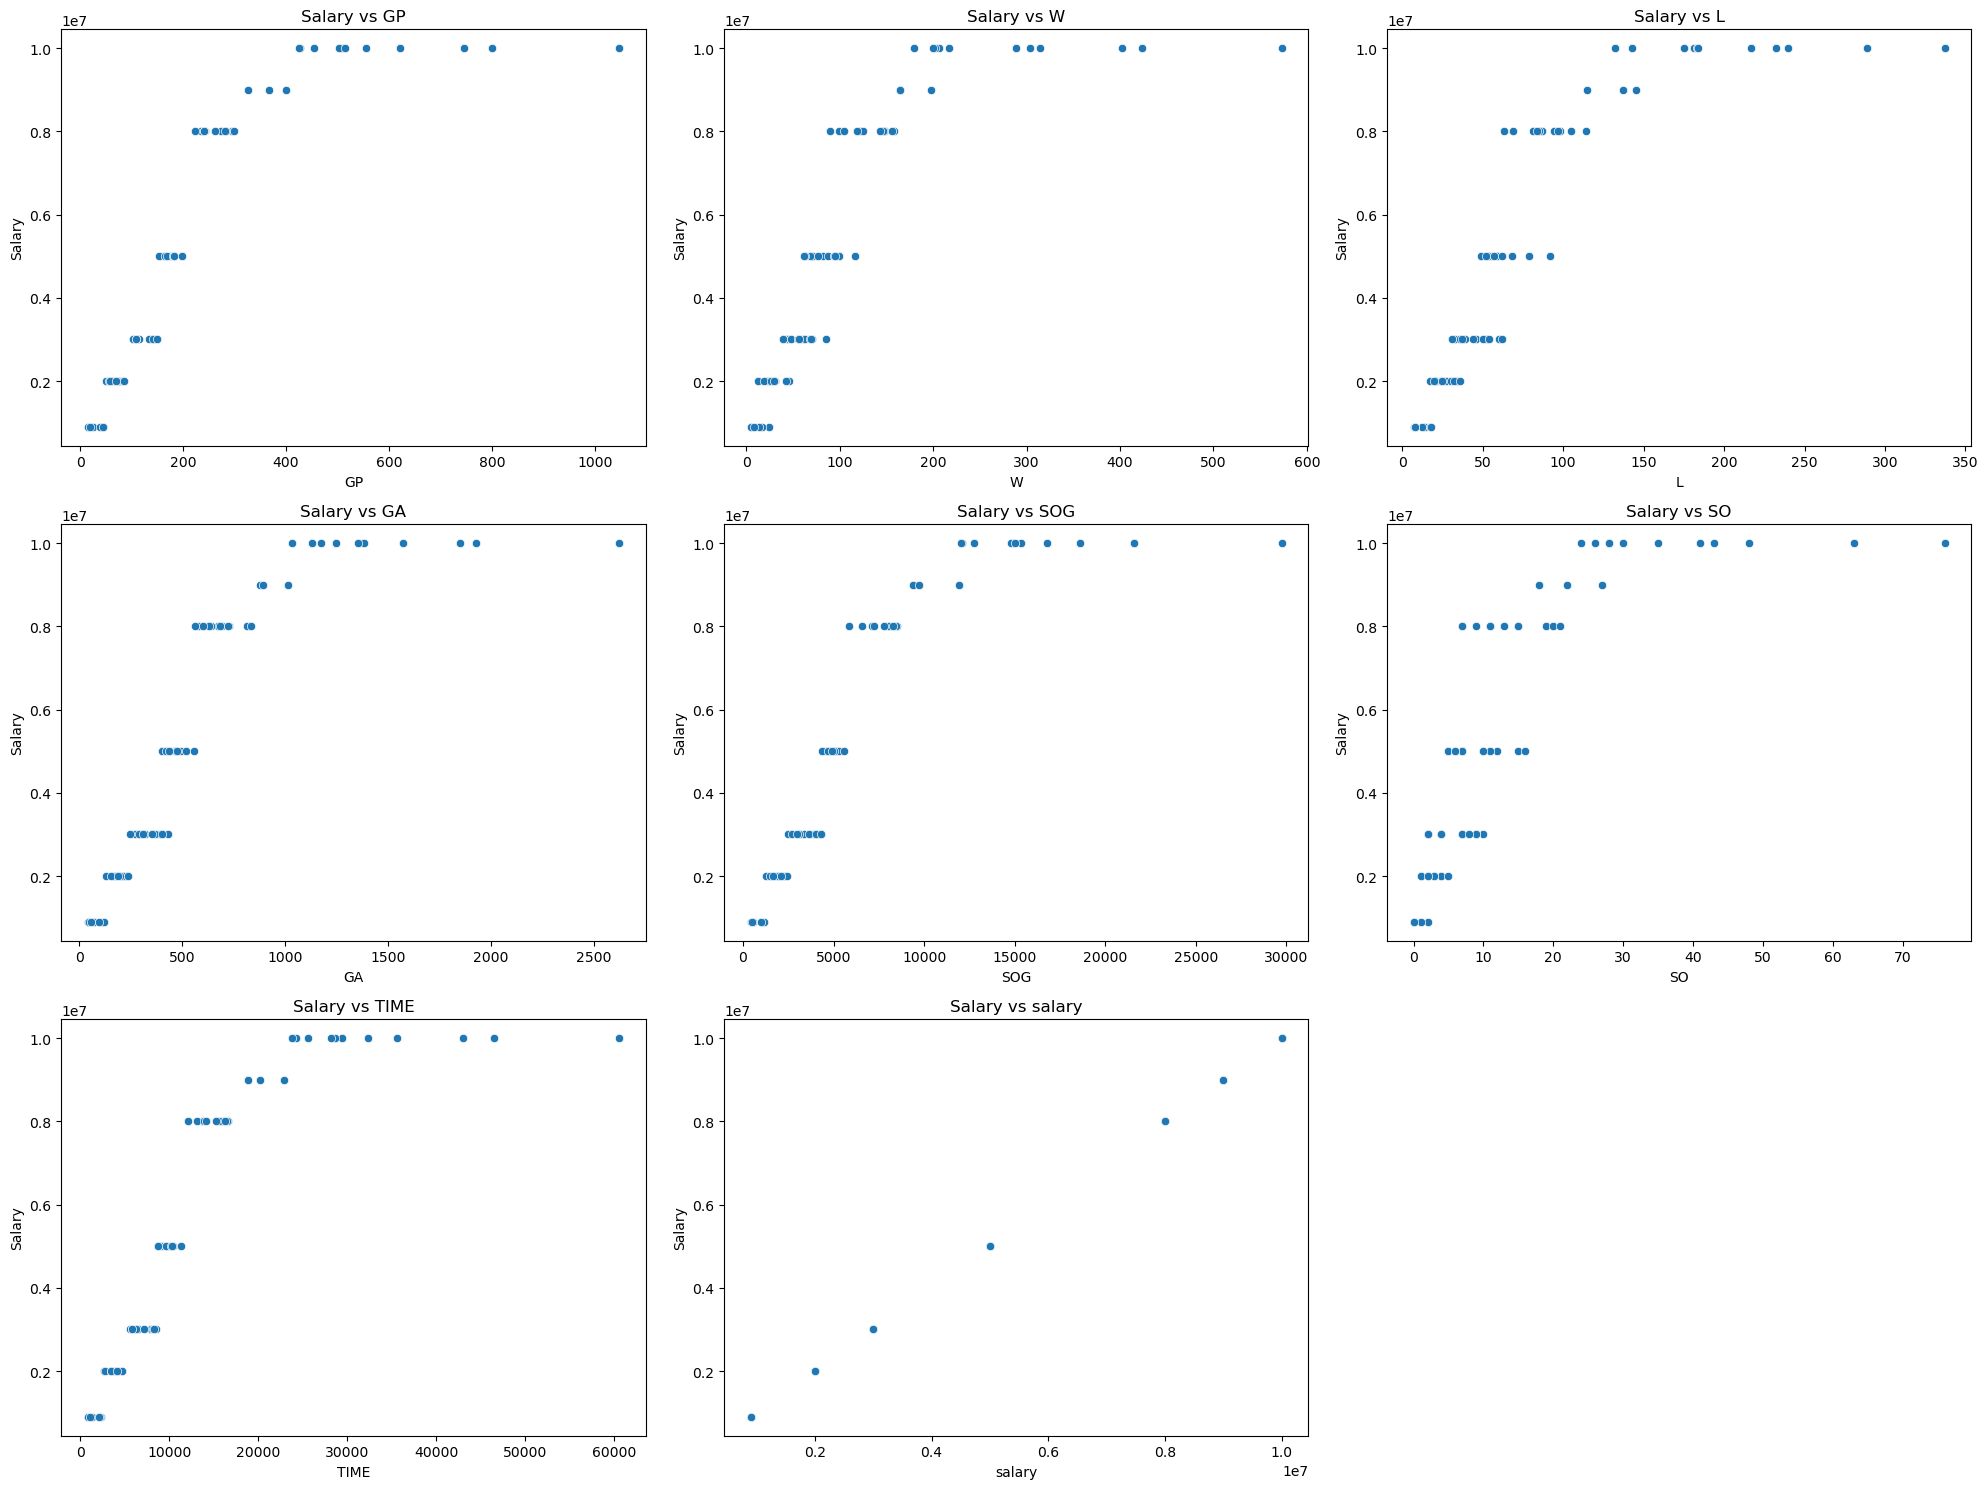

In [388]:
# Scatter plot for Salary vs other numerical features
features = ['GP', 'W', 'L', 'GA',
        'SOG', 'SO', 'TIME', 'salary']

# Create a grid of subplots
num_features = len(features)
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(features):
    sns.scatterplot(x=goalies[feature], y=goalies['salary'], ax=axes[i])
    axes[i].set_title(f'Salary vs {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Salary')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [389]:
time = goalies[goalies['TIME'] > 35000]
time

,name,GP,SV%_x,W,L,GA,SOG,SO,TIME,salary
6,"Bobrovsky, Sergei",745.0,0.914,424.0,240.0,1849.0,21594.0,48.0,42978.0,10000000
17,"Fleury, Marc-Andre",1047.0,0.912,573.0,337.0,2622.0,29745.0,76.0,60531.0,10000000
47,"Quick, Jonathan",801.0,0.911,402.0,289.0,1929.0,21590.0,63.0,46482.0,10000000
64,"Varlamov, Semyon",621.0,0.916,289.0,232.0,1572.0,18623.0,41.0,35629.0,10000000


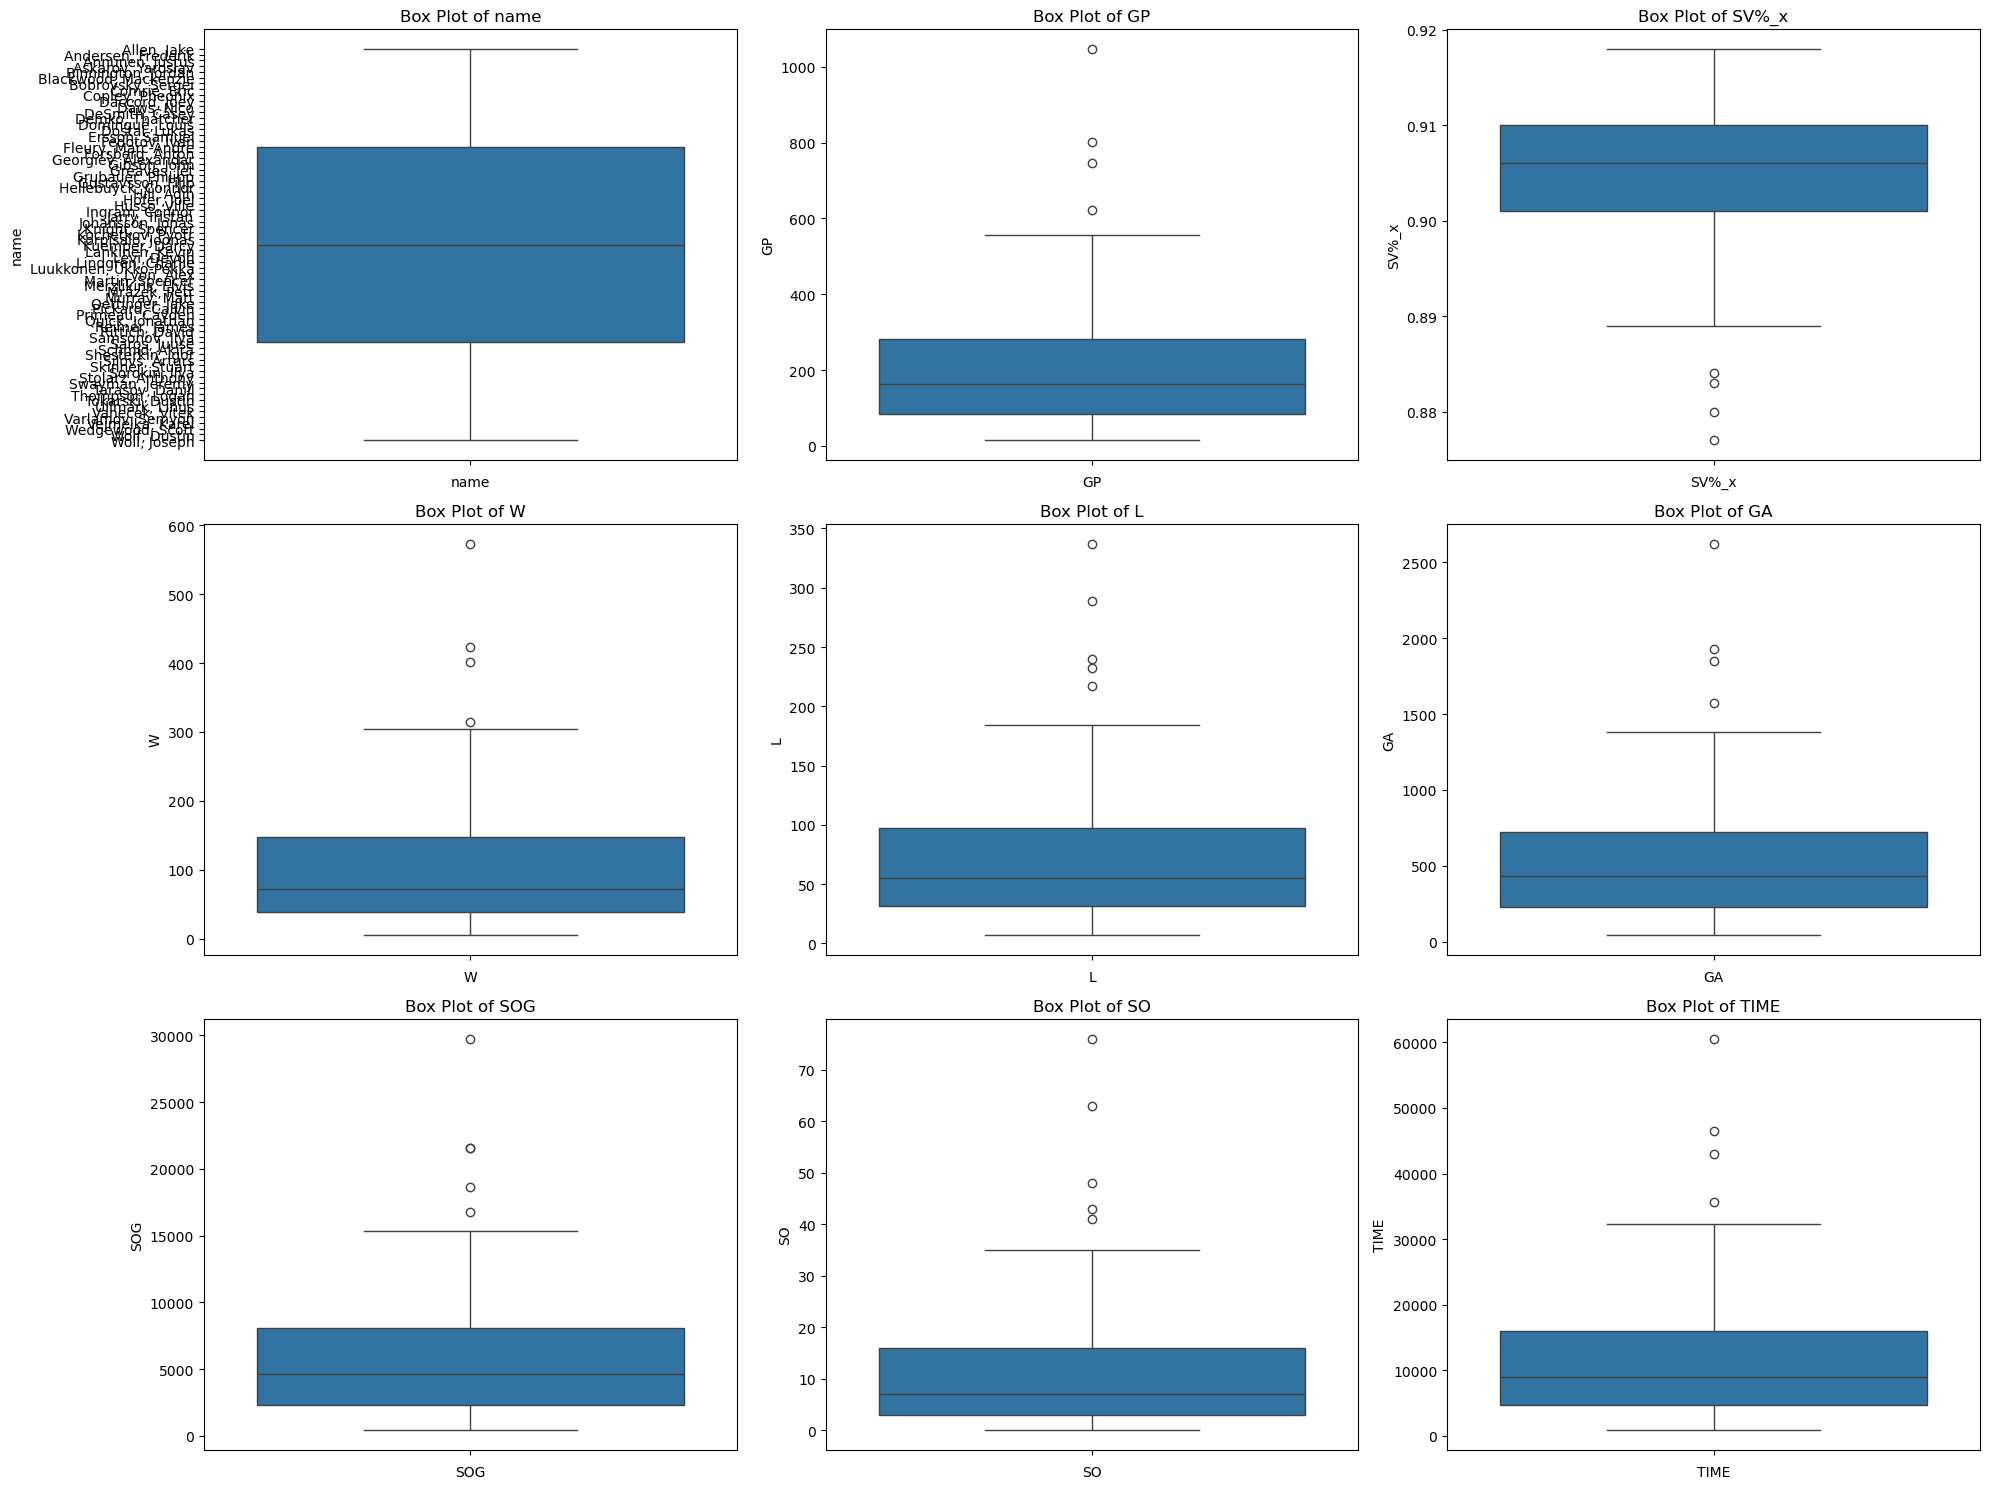

In [390]:
# Define the features to plot
features = goalies.columns.drop('salary')  # Exclude the target variable 'salary'

# Create a grid of subplots
num_features = len(features)
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(features):
    sns.boxplot(y=goalies[feature], ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature}')
    axes[i].set_xlabel(feature)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [391]:
goalies = goalies.drop(columns=['name'])
# Define the features and target
features = goalies.columns.drop('salary')
X = goalies[features]
y = goalies['salary']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [392]:
# # Perform PCA
# pca = PCA(n_components=0.95)  # Retain 95% of the variance
# X_pca = pca.fit_transform(X_scaled)

# # Explained variance ratio
# explained_variance = pca.explained_variance_ratio_
# print("Explained variance ratio:", explained_variance)

# # Cumulative explained variance
# cumulative_explained_variance = np.cumsum(explained_variance)
# print("Cumulative explained variance:", cumulative_explained_variance)

In [393]:
# # Plot explained variance ratio
# plt.figure(figsize=(10, 6))
# plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
# plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='Cumulative explained variance')
# plt.ylabel('Explained variance ratio')
# plt.xlabel('Principal components')
# plt.legend(loc='best')
# plt.title('Explained Variance Ratio by Principal Components')
# plt.show()

In [394]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f'Linear Regression MSE: {mse_lr}')
print(f'Linear Regression R2: {r2_lr}')

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest MSE: {mse_rf}')
print(f'Random Forest R2: {r2_rf}')

# XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f'XGBoost MSE: {mse_xgb}')
print(f'XGBoost R2: {r2_xgb}')

# Compare Model Performance
models = ['Linear Regression', 'Random Forest', 'XGBoost']
mse_scores = [mse_lr, mse_rf, mse_xgb]
r2_scores = [r2_lr, r2_rf, r2_xgb]
performance_df = pd.DataFrame({'Model': models, 'MSE': mse_scores, 'R2': r2_scores})
print(performance_df)

Linear Regression MSE: 3622050082691.911
Linear Regression R2: 0.5891656156205933
Random Forest MSE: 119736285714.28572
Random Forest R2: 0.9864188009259259
XGBoost MSE: 229285855232.0
XGBoost R2: 0.9739930629730225
               Model           MSE        R2
0  Linear Regression  3.622050e+12  0.589166
1      Random Forest  1.197363e+11  0.986419
2            XGBoost  2.292859e+11  0.973993


In [397]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0]
}

# Initialize the XGBoost regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}


In [398]:
# Train XGBoost model with best parameters
best_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', **best_params, random_state=42)
best_xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [399]:
# Predict on test set
y_pred_xgb = best_xgb_model.predict(X_test)

# Evaluate XGBoost model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f'XGBoost MSE: {mse_xgb}')
print(f'XGBoost R2: {r2_xgb}')

XGBoost MSE: 219777482752.0
XGBoost R2: 0.9750715494155884


In [402]:
# Define the output directory
output_dir = '/Users/blairjdaniel/lighthouse/lighthouse/NHL/NHL_points_projection/models'

# Create the directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Save the model
model_path = os.path.join(output_dir, 'best_xgb_model.pkl')
joblib.dump(best_xgb_model, model_path)
print(f"Model saved to {model_path}")

Model saved to /Users/blairjdaniel/lighthouse/lighthouse/NHL/NHL_points_projection/models/best_xgb_model.pkl


In [3]:
defense_rec = pd.read_csv('/Users/blairjdaniel/lighthouse/lighthouse/NHL/files/master_copies/defense_rec.csv')
defense_salary = pd.read_csv('/Users/blairjdaniel/lighthouse/lighthouse/NHL/files/salary/cap_all.csv')

In [5]:
# Define the bins and corresponding salary values
bins = [0.0, 0.01, 0.03, 0.05, 0.1, 0.2, 0.3, float('inf')]
labels = [950000, 2000000, 4000000, 6000000, 8000000, 10000000, 12000000]

# Use pd.cut to bin the values and map them to the salary values
defense_rec['salary'] = pd.cut(defense_rec['goals'], bins=bins, labels=labels, right=False)

# Display the first few rows of the updated DataFrame
defense_rec.to_csv('/Users/blairjdaniel/lighthouse/lighthouse/NHL/files/master_copies/forwards_rec_two.csv')

In [6]:
over_8000000 = defense_rec[defense_rec['games_played'] < 246]
over_8000000

,Unnamed: 0,name,d_zone_shift_starts,giveaways,goals,high_danger_goals,high_danger_shots,hits,low_danger_goals,low_danger_shots,...,games_played,icetime,on_ice_corsi_percentage,on_ice_fenwick_percentage,penalties_drawn,shots_blocked_by_player,assists,position_encoded,position,salary
1,4,Aaron Johnson,2.171233,0.424658,0.068493,0.027397,0.047945,1.568493,0.041096,1.308219,...,146,935.164384,0.013562,0.013630,0.164384,1.068493,0.164384,1,D,6000000
2,5,Aaron MacKenzie,2.000000,0.000000,0.000000,0.000000,0.000000,1.200000,0.000000,0.800000,...,5,878.000000,0.094000,0.104000,0.200000,1.600000,0.000000,1,D,950000
3,6,Aaron Ness,1.388889,0.319444,0.013889,0.000000,0.027778,0.583333,0.013889,1.069444,...,72,823.791667,0.045139,0.043750,0.125000,1.111111,0.083333,1,D,2000000
4,8,Aaron Rome,2.697115,0.350962,0.024038,0.009615,0.019231,1.322115,0.009615,1.235577,...,208,934.129808,0.013942,0.013894,0.110577,1.192308,0.100962,1,D,2000000
5,11,Aaron Ward,3.442857,0.321429,0.028571,0.000000,0.000000,2.285714,0.021429,0.971429,...,140,1081.121429,0.006286,0.006357,0.121429,1.878571,0.128571,1,D,2000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,2831,Yohann Auvitu,1.155172,0.517241,0.086207,0.000000,0.017241,0.655172,0.051724,2.431034,...,58,866.293103,0.018793,0.018448,0.051724,0.603448,0.137931,1,D,6000000
965,2833,Zac Jones,1.159420,0.565217,0.043478,0.000000,0.000000,0.565217,0.028986,1.405797,...,69,900.144928,0.026667,0.026232,0.028986,0.869565,0.202899,1,D,4000000
967,2843,Zach Redmond,2.075188,0.330827,0.067669,0.000000,0.015038,1.157895,0.037594,1.518797,...,133,901.255639,0.023609,0.023759,0.090226,1.120301,0.218045,1,D,6000000
968,2847,Zach Trotman,2.538462,0.373626,0.032967,0.000000,0.010989,1.747253,0.032967,2.153846,...,91,1010.450549,0.035275,0.036044,0.043956,1.230769,0.109890,1,D,4000000


In [10]:
# Define the over_8000000 DataFrame based on the criteria
over_8000000 = defense_rec[defense_rec['games_played'] < 246]

# Change the salary of all players in the over_8000000 DataFrame to $950,000 in the defense_rec DataFrame
defense_rec.loc[over_8000000.index, 'salary'] = 950000
defense_rec= defense_rec.drop(columns=['Unnamed: 0'])

In [11]:
defense_rec

,name,d_zone_shift_starts,giveaways,goals,high_danger_goals,high_danger_shots,hits,low_danger_goals,low_danger_shots,medium_danger_goals,...,games_played,icetime,on_ice_corsi_percentage,on_ice_fenwick_percentage,penalties_drawn,shots_blocked_by_player,assists,position_encoded,position,salary
0,Aaron Ekblad,3.949480,0.922734,0.169391,0.041605,0.104012,1.105498,0.092125,3.004458,0.035661,...,673,1369.442793,0.008083,0.008024,0.169391,1.074294,0.340267,1,D,8000000
1,Aaron Johnson,2.171233,0.424658,0.068493,0.027397,0.047945,1.568493,0.041096,1.308219,0.000000,...,146,935.164384,0.013562,0.013630,0.164384,1.068493,0.164384,1,D,950000
2,Aaron MacKenzie,2.000000,0.000000,0.000000,0.000000,0.000000,1.200000,0.000000,0.800000,0.000000,...,5,878.000000,0.094000,0.104000,0.200000,1.600000,0.000000,1,D,950000
3,Aaron Ness,1.388889,0.319444,0.013889,0.000000,0.027778,0.583333,0.013889,1.069444,0.000000,...,72,823.791667,0.045139,0.043750,0.125000,1.111111,0.083333,1,D,950000
4,Aaron Rome,2.697115,0.350962,0.024038,0.009615,0.019231,1.322115,0.009615,1.235577,0.004808,...,208,934.129808,0.013942,0.013894,0.110577,1.192308,0.100962,1,D,950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,Zach Werenski,3.500000,0.551440,0.185185,0.032922,0.104938,0.584362,0.104938,3.236626,0.047325,...,486,1403.553498,0.008868,0.008827,0.092593,1.269547,0.436214,1,D,8000000
970,Zach Whitecloud,2.773279,0.360324,0.068826,0.008097,0.040486,1.668016,0.048583,1.502024,0.012146,...,247,1055.174089,0.011781,0.012105,0.129555,1.655870,0.165992,1,D,6000000
971,Zachary Hayes,0.666667,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.666667,0.000000,...,3,653.000000,0.176667,0.156667,0.000000,0.333333,0.000000,1,D,950000
972,Zbynek Michalek,4.892514,0.397313,0.046065,0.005758,0.017274,1.000000,0.030710,1.708253,0.009597,...,521,1267.504798,0.007236,0.007313,0.147793,2.412668,0.159309,1,D,4000000


In [12]:
defense_rec.to_csv('/Users/blairjdaniel/lighthouse/lighthouse/NHL/files/master_copies/defense_rec_two.csv')